## Import Data ##

In [365]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt

data = pd.read_excel("diabetes new.xlsx")
df = data

In [367]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [369]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [371]:
df = df.drop(columns=["HighvsLow"])

In [373]:
X = df.drop(columns=["DiabetesPedigreeFunction"])
y = df["DiabetesPedigreeFunction"]

In [375]:
df

,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,50,6,148,72,35,0,33.6,627.000
1,31,1,85,66,29,0,26.6,351.000
2,32,8,183,64,0,0,23.3,672.000
3,21,1,1,66,23,94,28.1,167.000
4,33,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...,...
763,63,10,101,76,48,180,32.9,171.000
764,27,2,122,70,27,0,36.8,0.340
765,30,5,121,72,23,112,26.2,245.000
766,47,1,126,60,0,0,30.1,349.000


## Data Clean Up ##

In [377]:
stats.zscore(df) #Find outliers

,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1.425995,0.639947,0.844750,0.149641,0.907270,-0.692891,0.204013,1.100897
1,-0.190672,-0.844885,-1.110399,-0.160546,0.530902,-0.692891,-0.684422,0.015419
2,-0.105584,1.233880,1.930944,-0.263941,-1.288212,-0.692891,-1.103255,1.277877
3,-1.041549,-0.844885,-3.717264,-0.160546,0.154533,0.123302,-0.494043,-0.708232
4,-0.020496,-1.141852,0.503375,-1.504687,0.907270,0.765836,1.409746,-1.356026
...,...,...,...,...,...,...,...,...
763,2.532136,1.827813,-0.613853,0.356432,1.722735,0.870031,0.115169,-0.692501
764,-0.531023,-0.547919,0.037863,0.046245,0.405445,-0.692891,0.610154,-1.363688
765,-0.275760,0.342981,0.006829,0.149641,0.154533,0.279594,-0.735190,-0.401467
766,1.170732,-0.844885,0.162000,-0.470732,-1.288212,-0.692891,-0.240205,0.007554


In [379]:
#Drop outliers
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(694, 8)

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=["DiabetesPedigreeFunction"])
y = df["DiabetesPedigreeFunction"]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                 feature        VIF
0                    Age  15.606075
1            Pregnancies   3.469554
2                Glucose  20.248193
3  BloodPressure (mg/dL)  32.516598
4          SkinThickness   4.334545
5                Insulin   2.375838
6                    BMI  27.667612


In [289]:
#Drop Multicollinearity (For Regression Only, i.e. quantitative predictions)

df = df.drop(columns=[""])
df = df.drop(columns=[""])
df = df.drop(columns=[""])
df = df.drop(columns=[""])

X = df.drop(columns=["DiabetesPedigreeFunction"])
y = df["DiabetesPedigreeFunction"]

In [383]:
df.isna().sum()

Age                         0
Pregnancies                 0
Glucose                     0
BloodPressure (mg/dL)       0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [385]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)
df.shape

In [388]:
X = df.drop(columns=["DiabetesPedigreeFunction"])
y = df["DiabetesPedigreeFunction"]

In [390]:
from sklearn.preprocessing import StandardScaler

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [392]:
df

,0,1,2,3,4,5,6
0,1.481862,0.661822,0.920291,-0.021694,0.923415,-0.804027,0.207965
1,-0.184506,-0.864107,-1.180089,-0.507360,0.533129,-0.804027,-0.847174
2,-0.096803,1.272194,2.087169,-0.669249,-1.353255,-0.804027,-1.344596
3,-0.009099,-1.169293,0.553558,-2.611912,0.923415,1.057839,1.639940
4,-0.272210,0.356637,-0.146568,0.140195,-1.353255,-0.804027,-0.997908
...,...,...,...,...,...,...,...
689,2.622009,1.882566,-0.646659,0.302083,1.769036,1.190830,0.102451
690,-0.535321,-0.558921,0.053468,-0.183583,0.403034,-0.804027,0.690315
691,-0.272210,0.356637,0.020129,-0.021694,0.142843,0.437217,-0.907467
692,1.218751,-0.864107,0.186825,-0.993026,-1.353255,-0.804027,-0.319604


In [394]:
X = df.drop(columns=6)
y = df[6]
df

,0,1,2,3,4,5,6
0,1.481862,0.661822,0.920291,-0.021694,0.923415,-0.804027,0.207965
1,-0.184506,-0.864107,-1.180089,-0.507360,0.533129,-0.804027,-0.847174
2,-0.096803,1.272194,2.087169,-0.669249,-1.353255,-0.804027,-1.344596
3,-0.009099,-1.169293,0.553558,-2.611912,0.923415,1.057839,1.639940
4,-0.272210,0.356637,-0.146568,0.140195,-1.353255,-0.804027,-0.997908
...,...,...,...,...,...,...,...
689,2.622009,1.882566,-0.646659,0.302083,1.769036,1.190830,0.102451
690,-0.535321,-0.558921,0.053468,-0.183583,0.403034,-0.804027,0.690315
691,-0.272210,0.356637,0.020129,-0.021694,0.142843,0.437217,-0.907467
692,1.218751,-0.864107,0.186825,-0.993026,-1.353255,-0.804027,-0.319604


## Statistical Modeling ##

In [396]:
df.describe()

,0,1,2,3,4,5,6
count,6.940000e+02,6.940000e+02,6.940000e+02,6.940000e+02,6.940000e+02,6.940000e+02,6.940000e+02
mean,2.249241e-16,6.654939e-17,-8.702613e-17,-2.226845e-16,-4.095347e-17,-3.199490e-17,-7.192453e-16
std,1.000721e+00,1.000721e+00,1.000721e+00,1.000721e+00,1.000721e+00,1.000721e+00,1.000721e+00
min,-1.061542e+00,-1.169293e+00,-2.547003e+00,-3.907021e+00,-1.353255e+00,-8.040268e-01,-2.113340e+00
25%,-7.984313e-01,-8.641070e-01,-7.133375e-01,-6.692485e-01,-1.353255e+00,-8.040268e-01,-7.265864e-01
50%,-3.599133e-01,-2.537352e-01,-1.799077e-01,-2.169401e-02,1.428426e-01,-3.330190e-01,-3.320929e-02
75%,6.048263e-01,6.618224e-01,6.202371e-01,6.258605e-01,7.282722e-01,5.923727e-01,6.262526e-01
max,3.060527e+00,2.798124e+00,2.620599e+00,4.025522e+00,2.549609e+00,3.795226e+00,3.433676e+00


In [398]:
df.corr()

,0,1,2,3,4,5,6
0,1.000000,0.568067,0.264247,0.354206,-0.152610,-0.083825,0.058469
1,0.568067,1.000000,0.149503,0.232271,-0.098512,-0.081567,0.034367
2,0.264247,0.149503,1.000000,0.236322,0.011199,0.268577,0.203063
3,0.354206,0.232271,0.236322,1.000000,-0.001309,-0.078836,0.266080
4,-0.152610,-0.098512,0.011199,-0.001309,1.000000,0.460906,0.382311
5,-0.083825,-0.081567,0.268577,-0.078836,0.460906,1.000000,0.163125
6,0.058469,0.034367,0.203063,0.266080,0.382311,0.163125,1.000000


In [400]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([2.72274107e-15, 2.83194700e-16, 2.61946684e-04, 1.01239838e-01,
       9.00220035e-22, 1.68063474e-42])

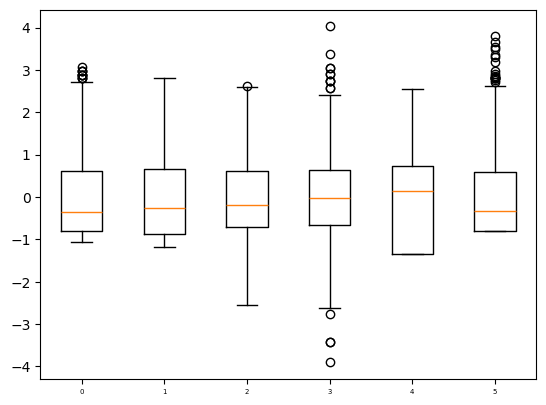

In [402]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)
plt.show()

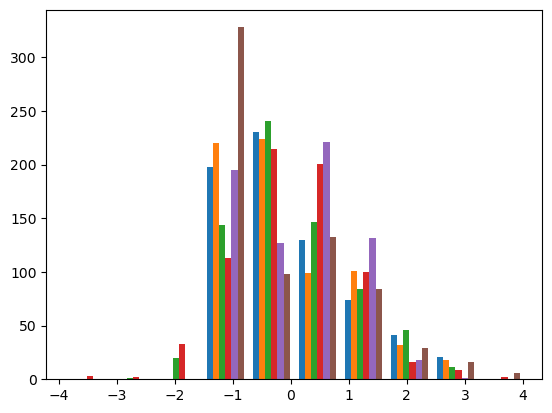

In [404]:
plt.hist(X)
plt.show()

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='4', ylabel='2'>, <Axes: xlabel='5', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>,
        <Axes: xlabel='4', ylabel='3'>, <Axes: xlabel='5', ylabel='3'>],
       [<Axes: xlabel='0', ylabel='4'>, <Axes: xlabel='1', ylabel='4'>,
        <Axes: xlabel='2', ylabel='4'>, <Axes: xlabel='3', y

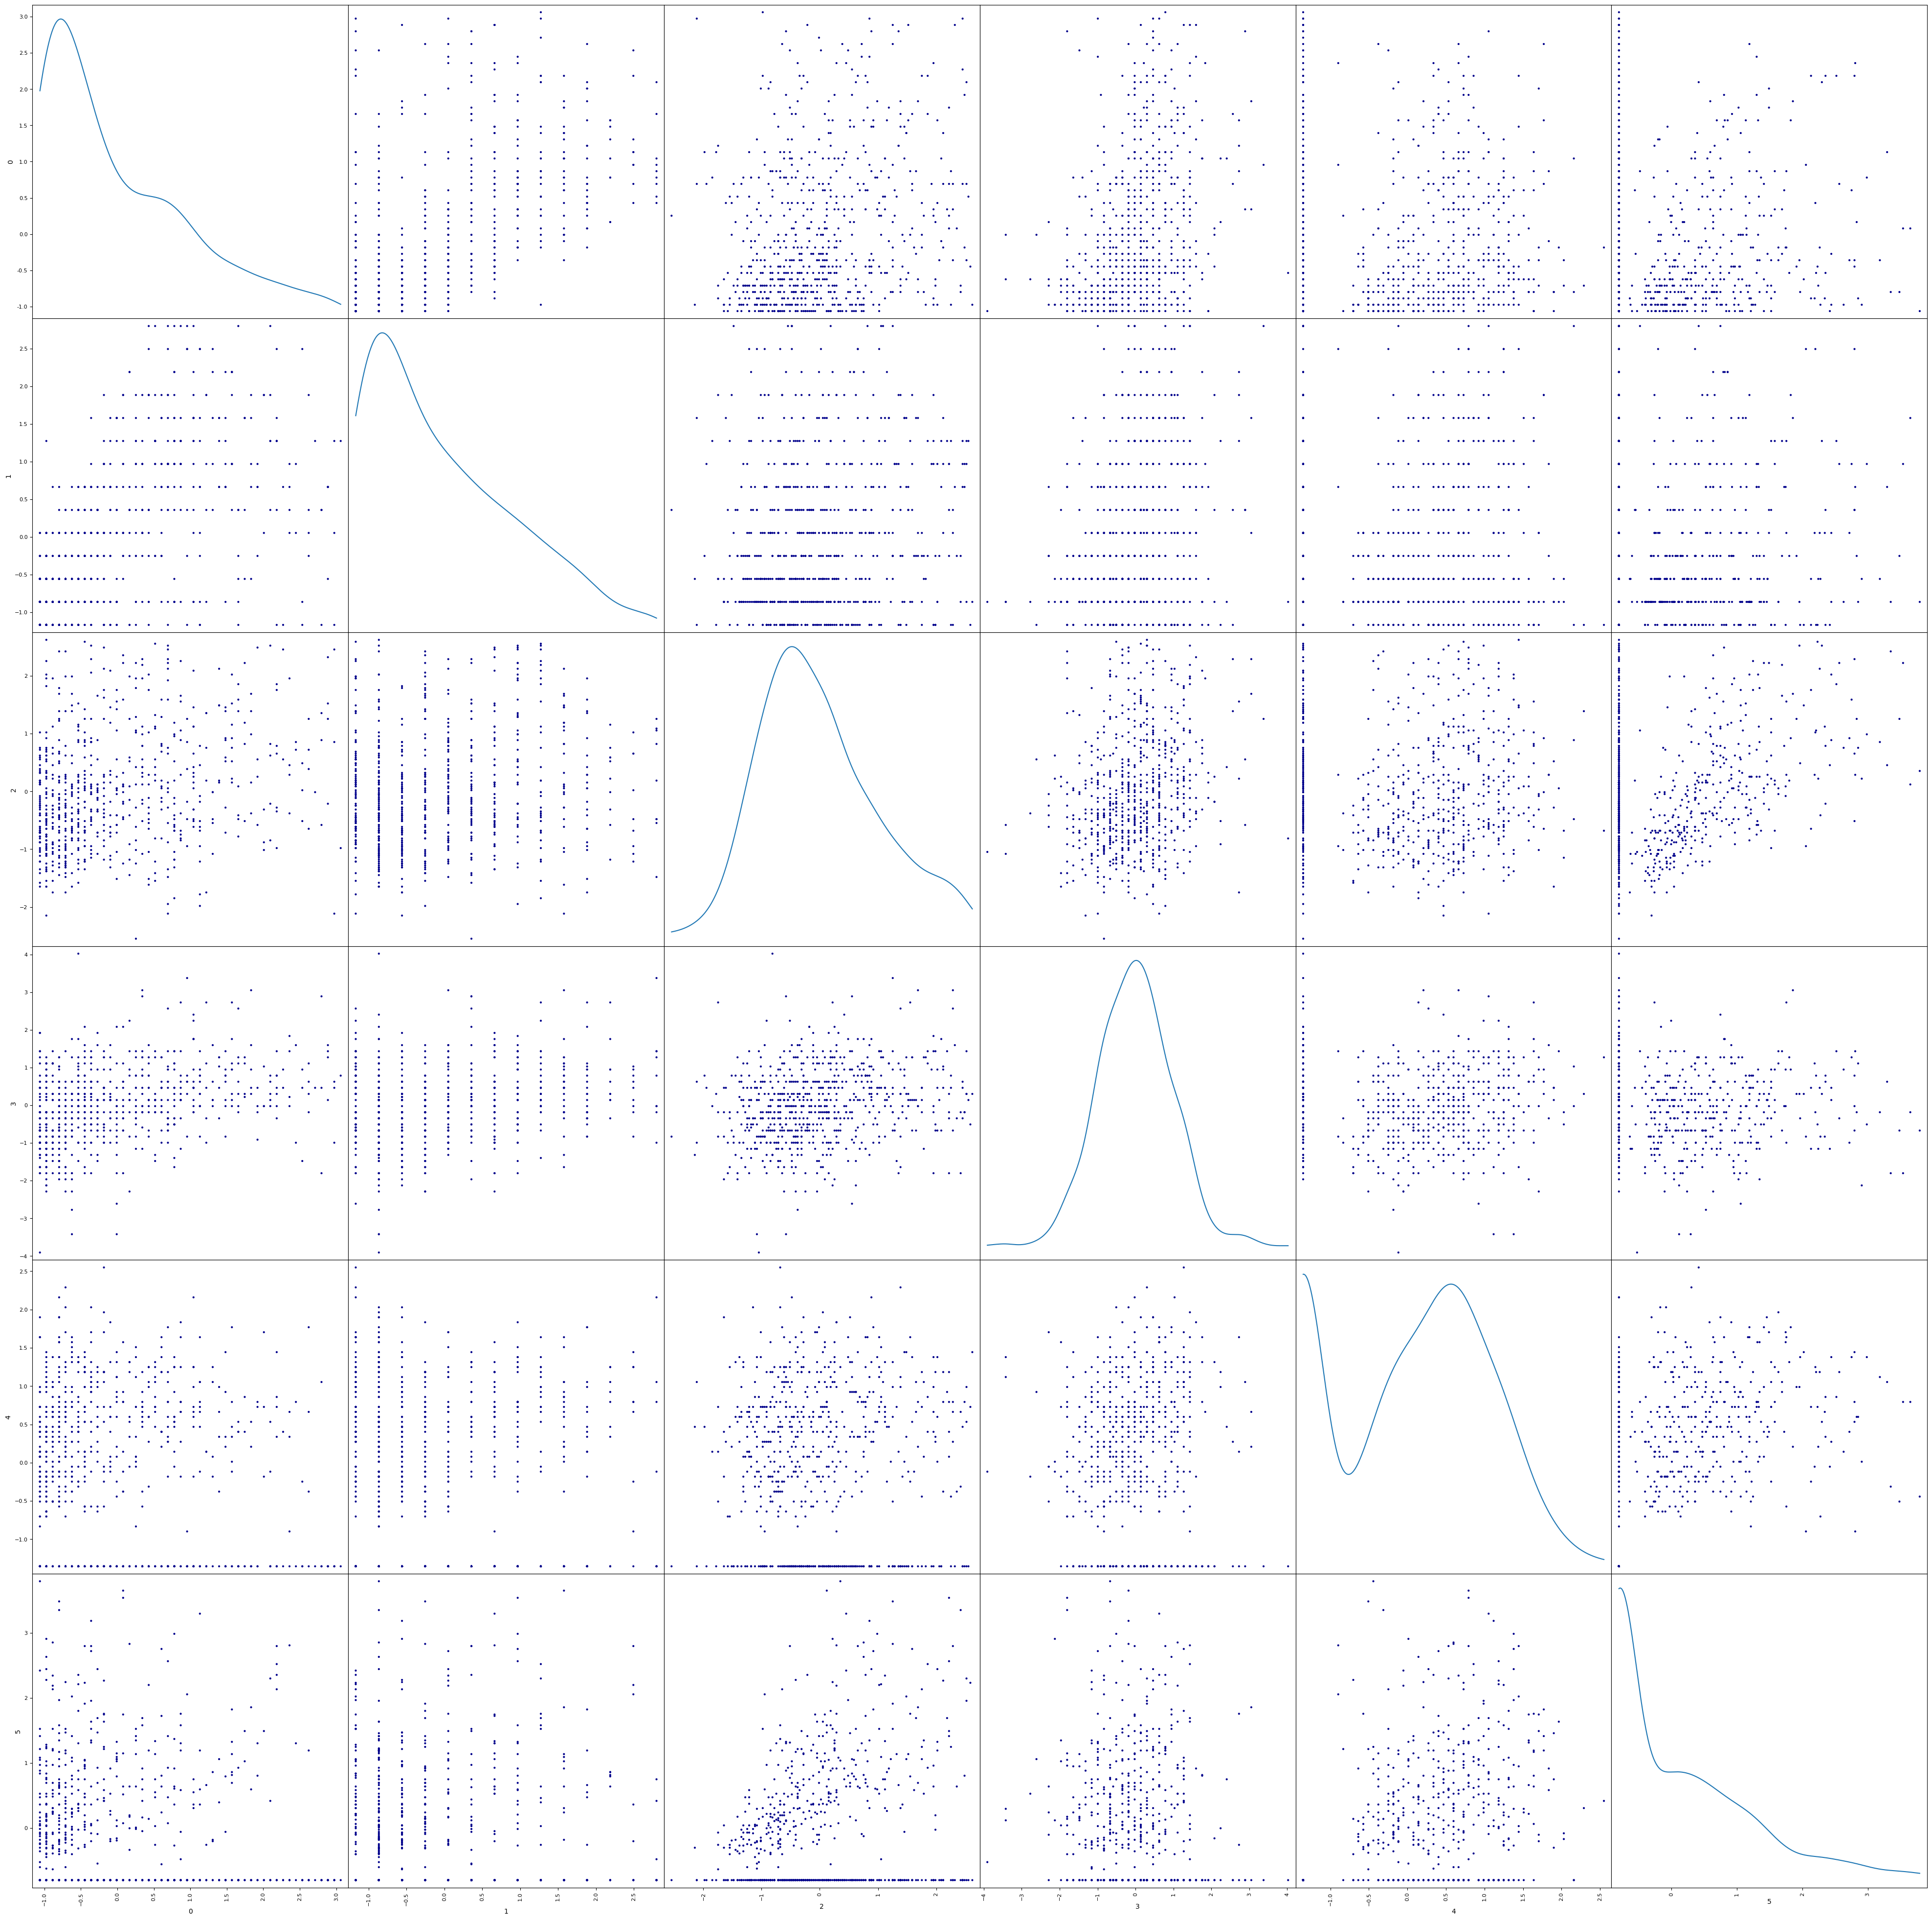

In [406]:
from pandas.plotting import scatter_matrix

#plt.show() for some reason messes up importing the file to github
scatter_matrix(X, alpha = 1, figsize = (50, 50), diagonal = "kde", c="#00008B")

## Fine-Tuning ##

In [408]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [410]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.6485   | 8.116     | 19.06     | 15.18     |
| 2         | -0.6727   | 12.37     | 3.964     | 4.808     |
| 3         | -0.6756   | 2.104     | 17.46     | 12.82     |
| 4         | -0.6639   | 14.45     | 1.391     | 19.46     |
| 5         | -0.6554   | 16.82     | 5.034     | 5.273     |
| 6         | -0.6476   | 4.485     | 6.781     | 11.45     |
| 7         | -0.6476   | 4.317     | 6.435     | 11.3      |
| 8         | -0.6485   | 11.74     | 19.36     | 16.74     |
| 9         | -0.6485   | 12.03     | 19.82     | 11.75     |
| 10        | -0.6515   | 12.03     | 14.37     | 13.89     |
| 11        | -0.7384   | 1.919     | 5.012     | 15.82     |
| 12        | -0.6472   | 5.975     | 7.48      | 7.761     |
| 13        | -0.7384   | 1.209     | 8.514     | 7.696     |
| 14        | -0.6556   | 7.755     | 5.235     | 9.856     |
| 15    

In [412]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = DecisionTreeRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.721    | 8.116     | 19.06     | 15.18     |
| 2         | -0.9861   | 12.37     | 3.964     | 4.808     |
| 3         | -0.7143   | 2.104     | 17.46     | 12.82     |
| 4         | -0.9395   | 14.45     | 1.391     | 19.46     |
| 5         | -0.8663   | 16.82     | 5.034     | 5.273     |
| 6         | -0.735    | 4.485     | 6.781     | 11.45     |
| 7         | -0.7533   | 5.028     | 12.69     | 15.59     |
| 8         | -0.7338   | 6.752     | 18.05     | 7.845     |
| 9         | -0.7896   | 1.18      | 12.45     | 7.616     |
| 10        | -0.7896   | 1.94      | 19.9      | 19.68     |
| 11        | -0.721    | 15.12     | 19.64     | 10.13     |
| 12        | -0.721    | 18.98     | 19.92     | 17.76     |
| 13        | -0.721    | 19.32     | 19.77     | 2.067     |
| 14        | -0.7672   | 19.97     | 13.98     | 12.12     |
| 15    

In [414]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 13}


## Training Model ##

In [ ]:
#Switch all classifiers to regressors when dealing with quantitative data (i.e. temperature, pay, etc.)

In [464]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import joblib

#model1 = RandomForestRegressor(max_depth = 18, min_samples_leaf = 1, min_samples_split = 2).fit(X_train, y_train)
model1 = RandomForestRegressor(n_estimators = 100, random_state=42).fit(X_train, y_train)

score = model1.score(X, y)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model1, "Diabetes_New.joblib")
    model = joblib.load("Diabetes_New.joblib")

Accuracy: 0.7243507178364528


In [498]:
from sklearn.tree import DecisionTreeRegressor
import joblib

model2 = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 4, min_samples_split = 19).fit(X_train, y_train)

score = model1.score(X, y)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model2, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.7243507178364528


In [496]:
from sklearn.neighbors import KNeighborsRegressor
import joblib

model3 = KNeighborsRegressor(n_neighbors=13).fit(X_train, y_train)

score = model3.score(X, y)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model3, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.33582581864050465


In [494]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 
import joblib


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
model4 = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3).fit(X_train, y_train)

score = model4.score(X, y)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.101 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.193 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.057 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.195 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.163 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.172 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.338 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.127 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.314 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.245 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.118 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [492]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

linreg = LinearRegression()

param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

model5 = GridSearchCV(linreg, param_space, cv=10).fit(X_train, y_train)

score = model5.score(X, y)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model5, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.2339681588470256


## Post-Training Analysis ##

In [466]:
y_predicted = model.predict(X_test)

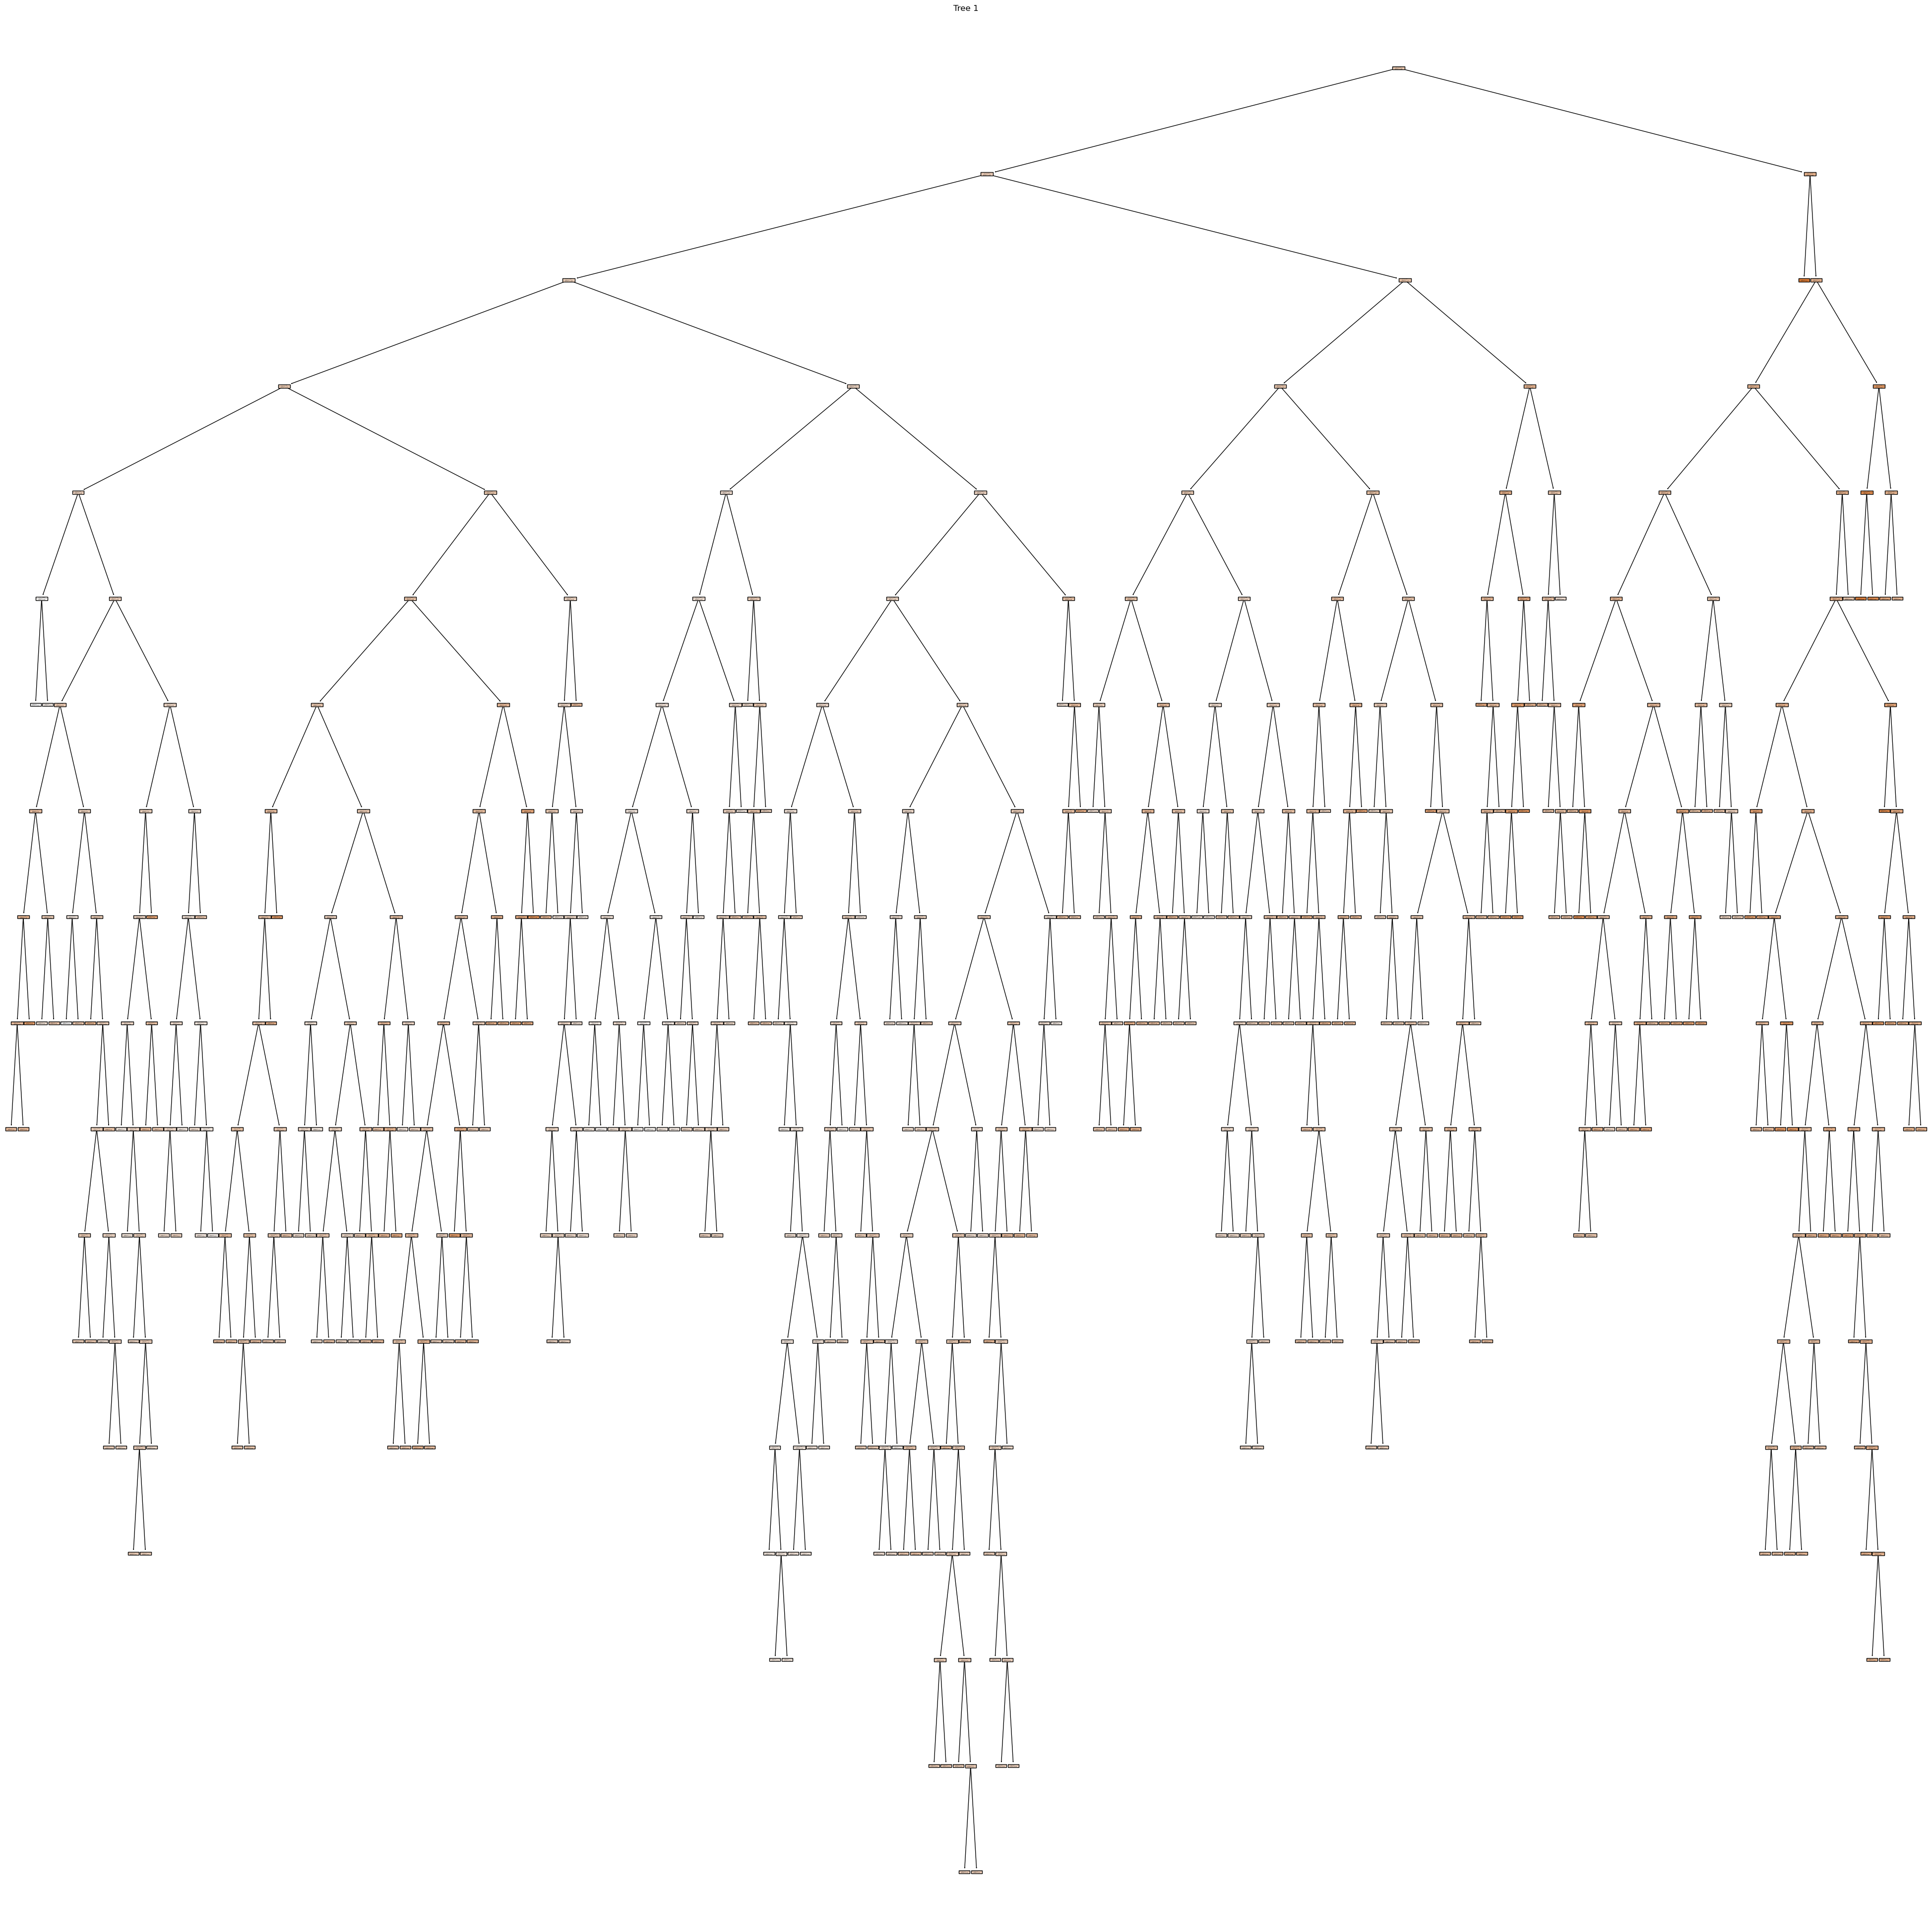

In [490]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
#If the model is a random forest use this for visualization

for i in range(1):
    plt.figure(figsize=(50, 50))
    plot_tree(model.estimators_[i], feature_names=X.columns,
              filled=True)
    plt.title(f"Tree {i+1}")
    plt.show()